# Wine exploration.
The ["Wine" dataset](https://archive.ics.uci.edu/ml/datasets/wine) is a popular classification dataset on UCI's dataset repository.

It is intended as a classification task:  
The wines, coming from different grape cultivars, were then chemically analysed.  
The classification question is: From the checical alanysis, can we predict which cultivar the wine came from?

Note, the cultivar is given the column name 'Class'. There are 3 classes, for which the values are given as integers (1,2,3).

There are 178 samples, with no missing values.  
These are made up of 12 predictor variables, and 1 class output.

### Results
In the end, we generate a classifier with very good properties using a (per class) Logistic Regression.
It manages to identify each of the test data correctly (out of 36 instances, 14/14/8 class split).

### Method
These were some of the steps in the investigation

In [1]:
import sklearn
import numpy as np

wine_column_names = (
    "Class", #This was added as the column has no explicit name
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
)

with open("wine.data", "r") as fin:
    wine_data = np.genfromtxt(
        fin, delimiter=",",
        names=wine_column_names,
    )

wine_data[:5]

array([(1., 14.23, 1.71, 2.43, 15.6, 127., 2.8 , 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.),
       (1., 13.2 , 1.78, 2.14, 11.2, 100., 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4 , 1050.),
       (1., 13.16, 2.36, 2.67, 18.6, 101., 2.8 , 3.24, 0.3 , 2.81, 5.68, 1.03, 3.17, 1185.),
       (1., 14.37, 1.95, 2.5 , 16.8, 113., 3.85, 3.49, 0.24, 2.18, 7.8 , 0.86, 3.45, 1480.),
       (1., 13.24, 2.59, 2.87, 21. , 118., 2.8 , 2.69, 0.39, 1.82, 4.32, 1.04, 2.93,  735.)],
      dtype=[('Class', '<f8'), ('Alcohol', '<f8'), ('Malic_acid', '<f8'), ('Ash', '<f8'), ('Alcalinity_of_ash', '<f8'), ('Magnesium', '<f8'), ('Total_phenols', '<f8'), ('Flavanoids', '<f8'), ('Nonflavanoid_phenols', '<f8'), ('Proanthocyanins', '<f8'), ('Color_intensity', '<f8'), ('Hue', '<f8'), ('OD280OD315_of_diluted_wines', '<f8'), ('Proline', '<f8')])

In [2]:
type(wine_data)

numpy.ndarray

In [3]:
# Although note that the class is being put in as a float
# - could be helpful to convert it to a string to indicate
# it is not a continuous (or even ordered) value.

wine_data['Class'] = wine_data['Class'].astype('int').astype('str') #Int conversion needed to remove the ".0" part...
# However direct assignment fails to change the type on ndarrays?
wine_data['Class'].dtype

dtype('float64')

In [4]:
#Read it with pandas for some summary info
import pandas
pd = pandas #alias

wine_data_p = pandas.read_csv(
    "wine.data",
    header=None,
    names=wine_column_names,
)
wine_data_p

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

In [5]:
#note, class is currently being treated as an int, though should be a string / factor with levels.
wine_data_p["Class"] = wine_data_p["Class"].astype(str)

In [6]:
wine_data_p.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

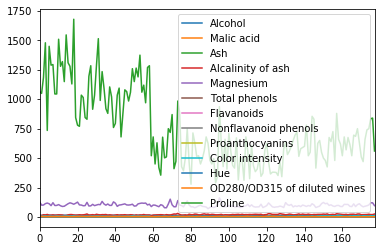

In [7]:
wine_data_p.plot()

In [8]:
# Use seaborn for nice pair plots (showing pairwise distributions)
import seaborn as sns

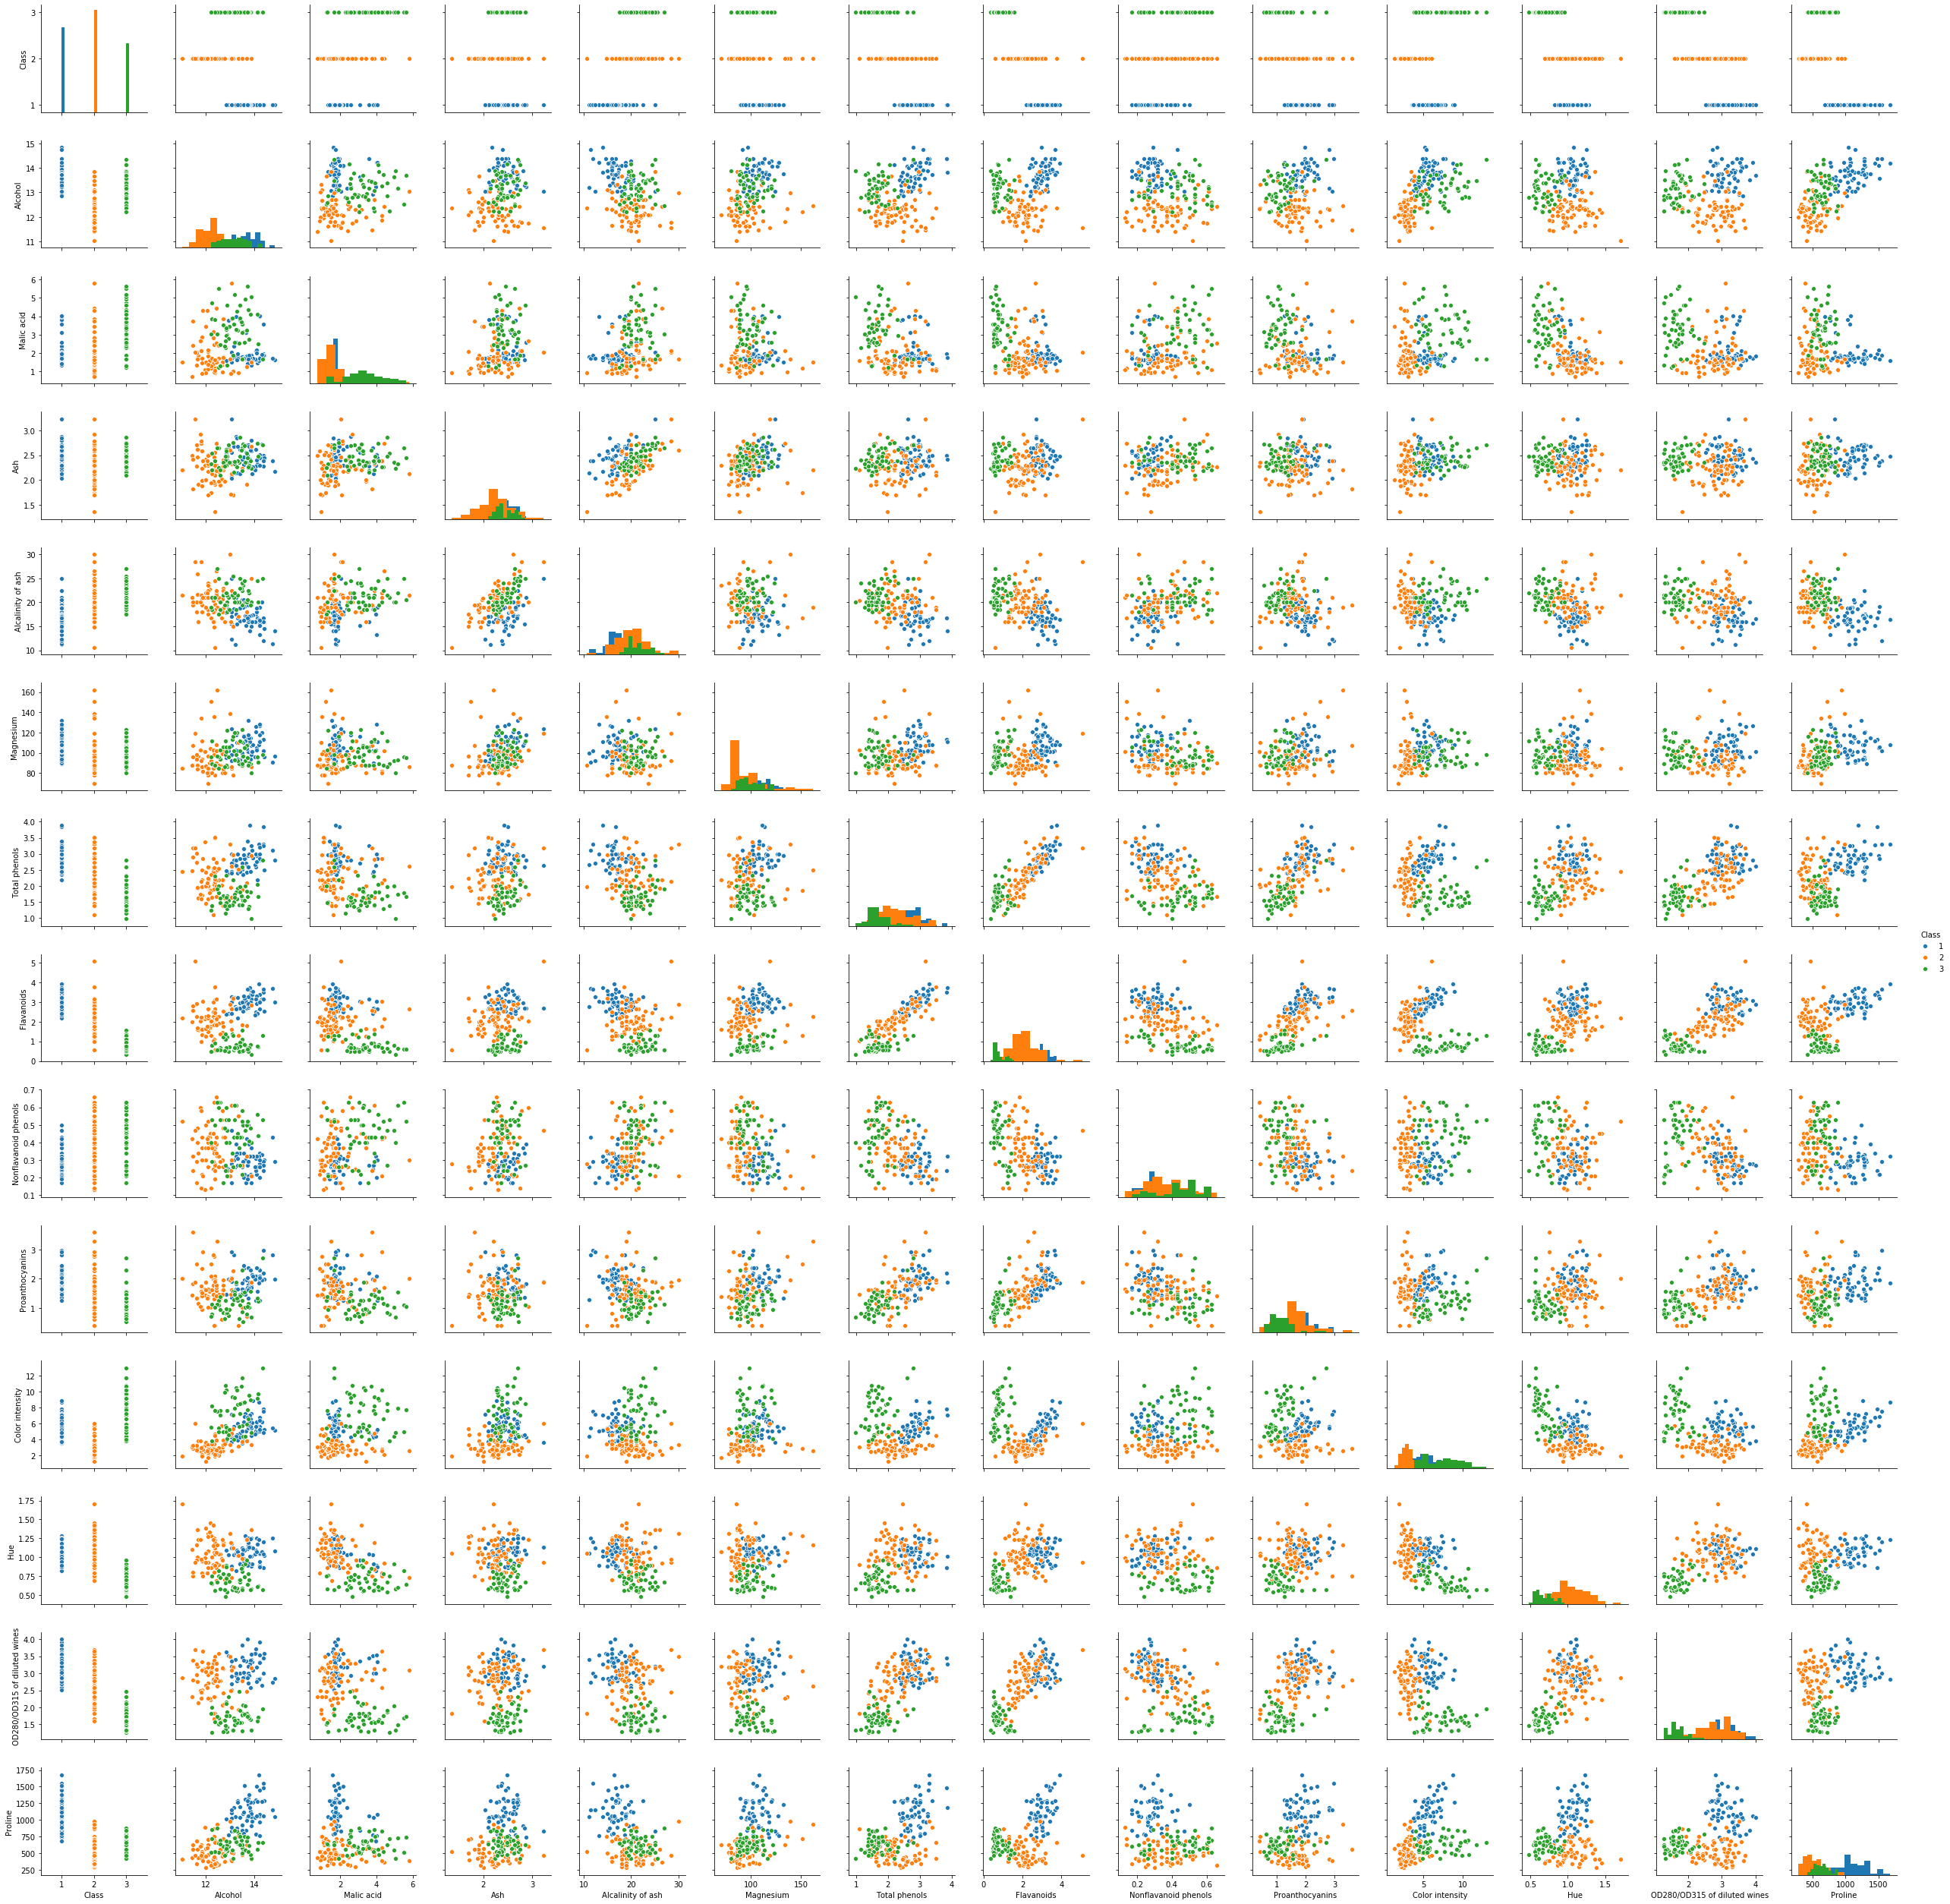

In [9]:
sns.pairplot(data=wine_data_p, hue="Class", diag_kind='hist'); #hist fixes a 'Singular Matrix' error from a kde??

In [10]:

# Quick hack to convert 1,2,3 to 'c1','c2','c3'
w_cl = ('c'+ wine_data_p["Class"])
w_cl

0      c1
1      c1
2      c1
3      c1
4      c1
       ..
173    c3
174    c3
175    c3
176    c3
177    c3
Name: Class, Length: 178, dtype: object

In [11]:
wine_data_p["Class"] = w_cl
wine_data_p

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      c1    14.23        1.71  2.43               15.6        127   
1      c1    13.20        1.78  2.14               11.2        100   
2      c1    13.16        2.36  2.67               18.6        101   
3      c1    14.37        1.95  2.50               16.8        113   
4      c1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
173    c3    13.71        5.65  2.45               20.5         95   
174    c3    13.40        3.91  2.48               23.0        102   
175    c3    13.27        4.28  2.26               20.0        120   
176    c3    13.17        2.59  2.37               20.0        120   
177    c3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

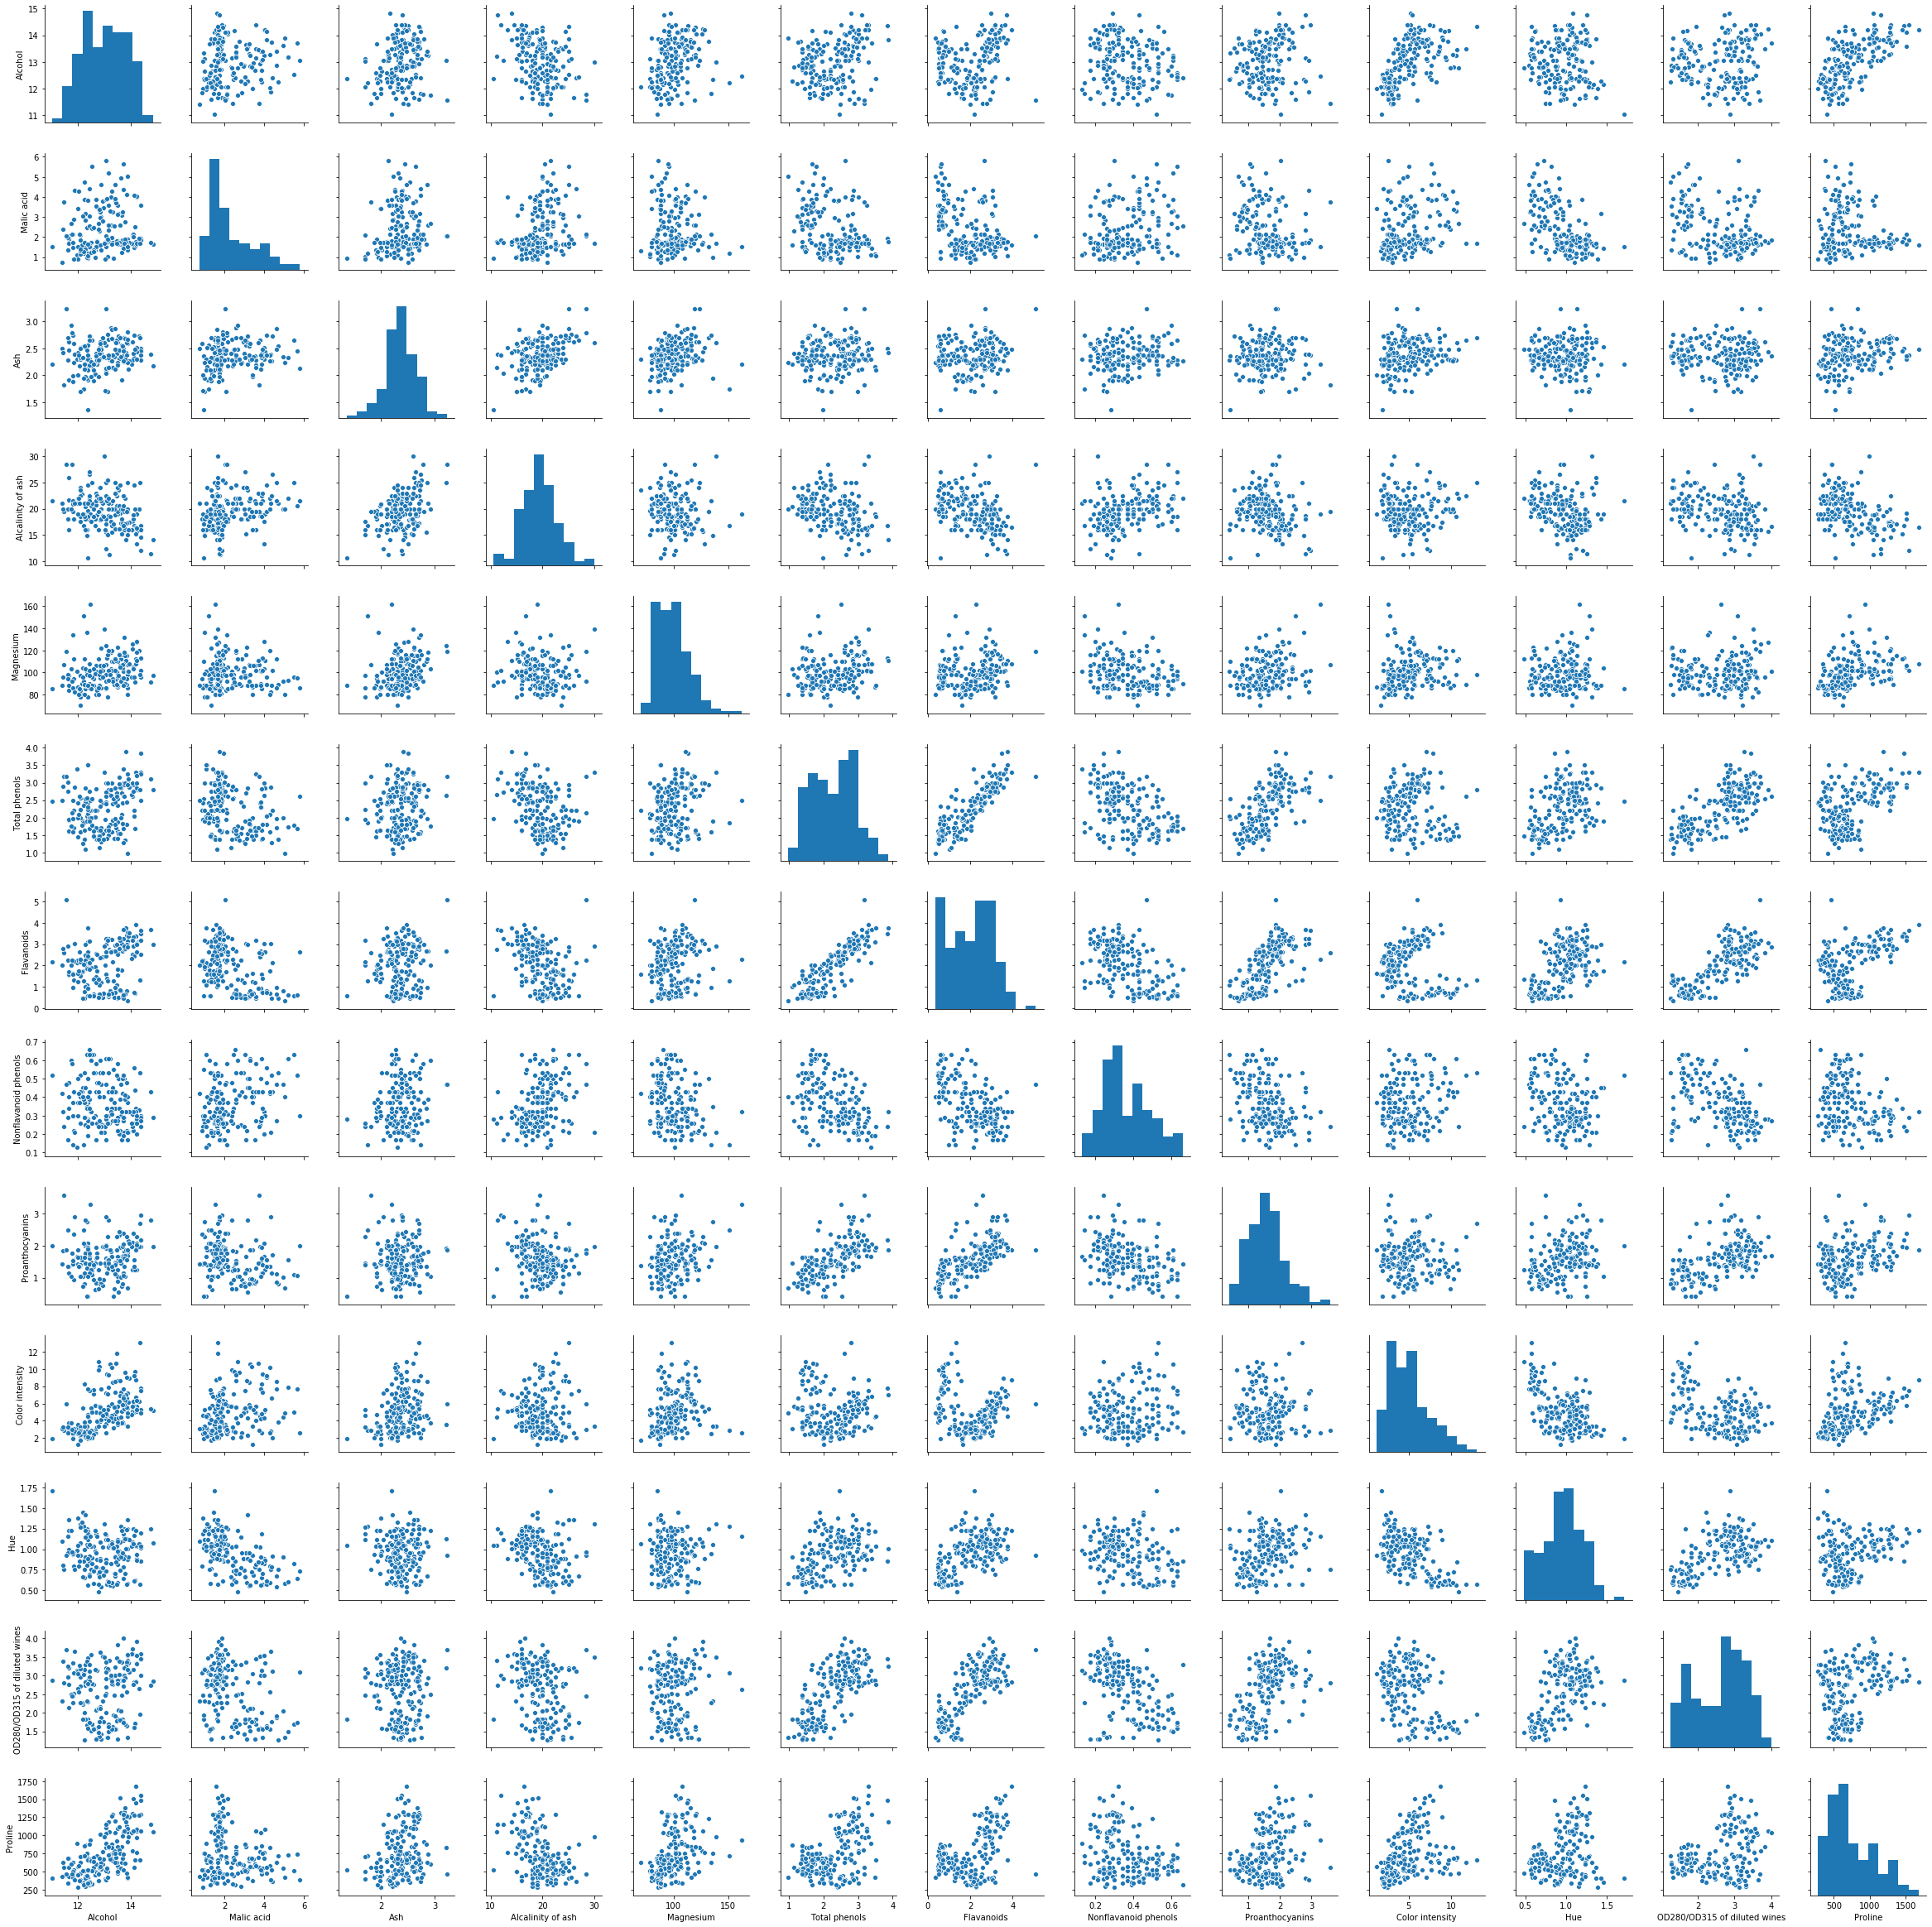

In [12]:
#Lets plot the data overall
sns.pairplot(data=wine_data_p)

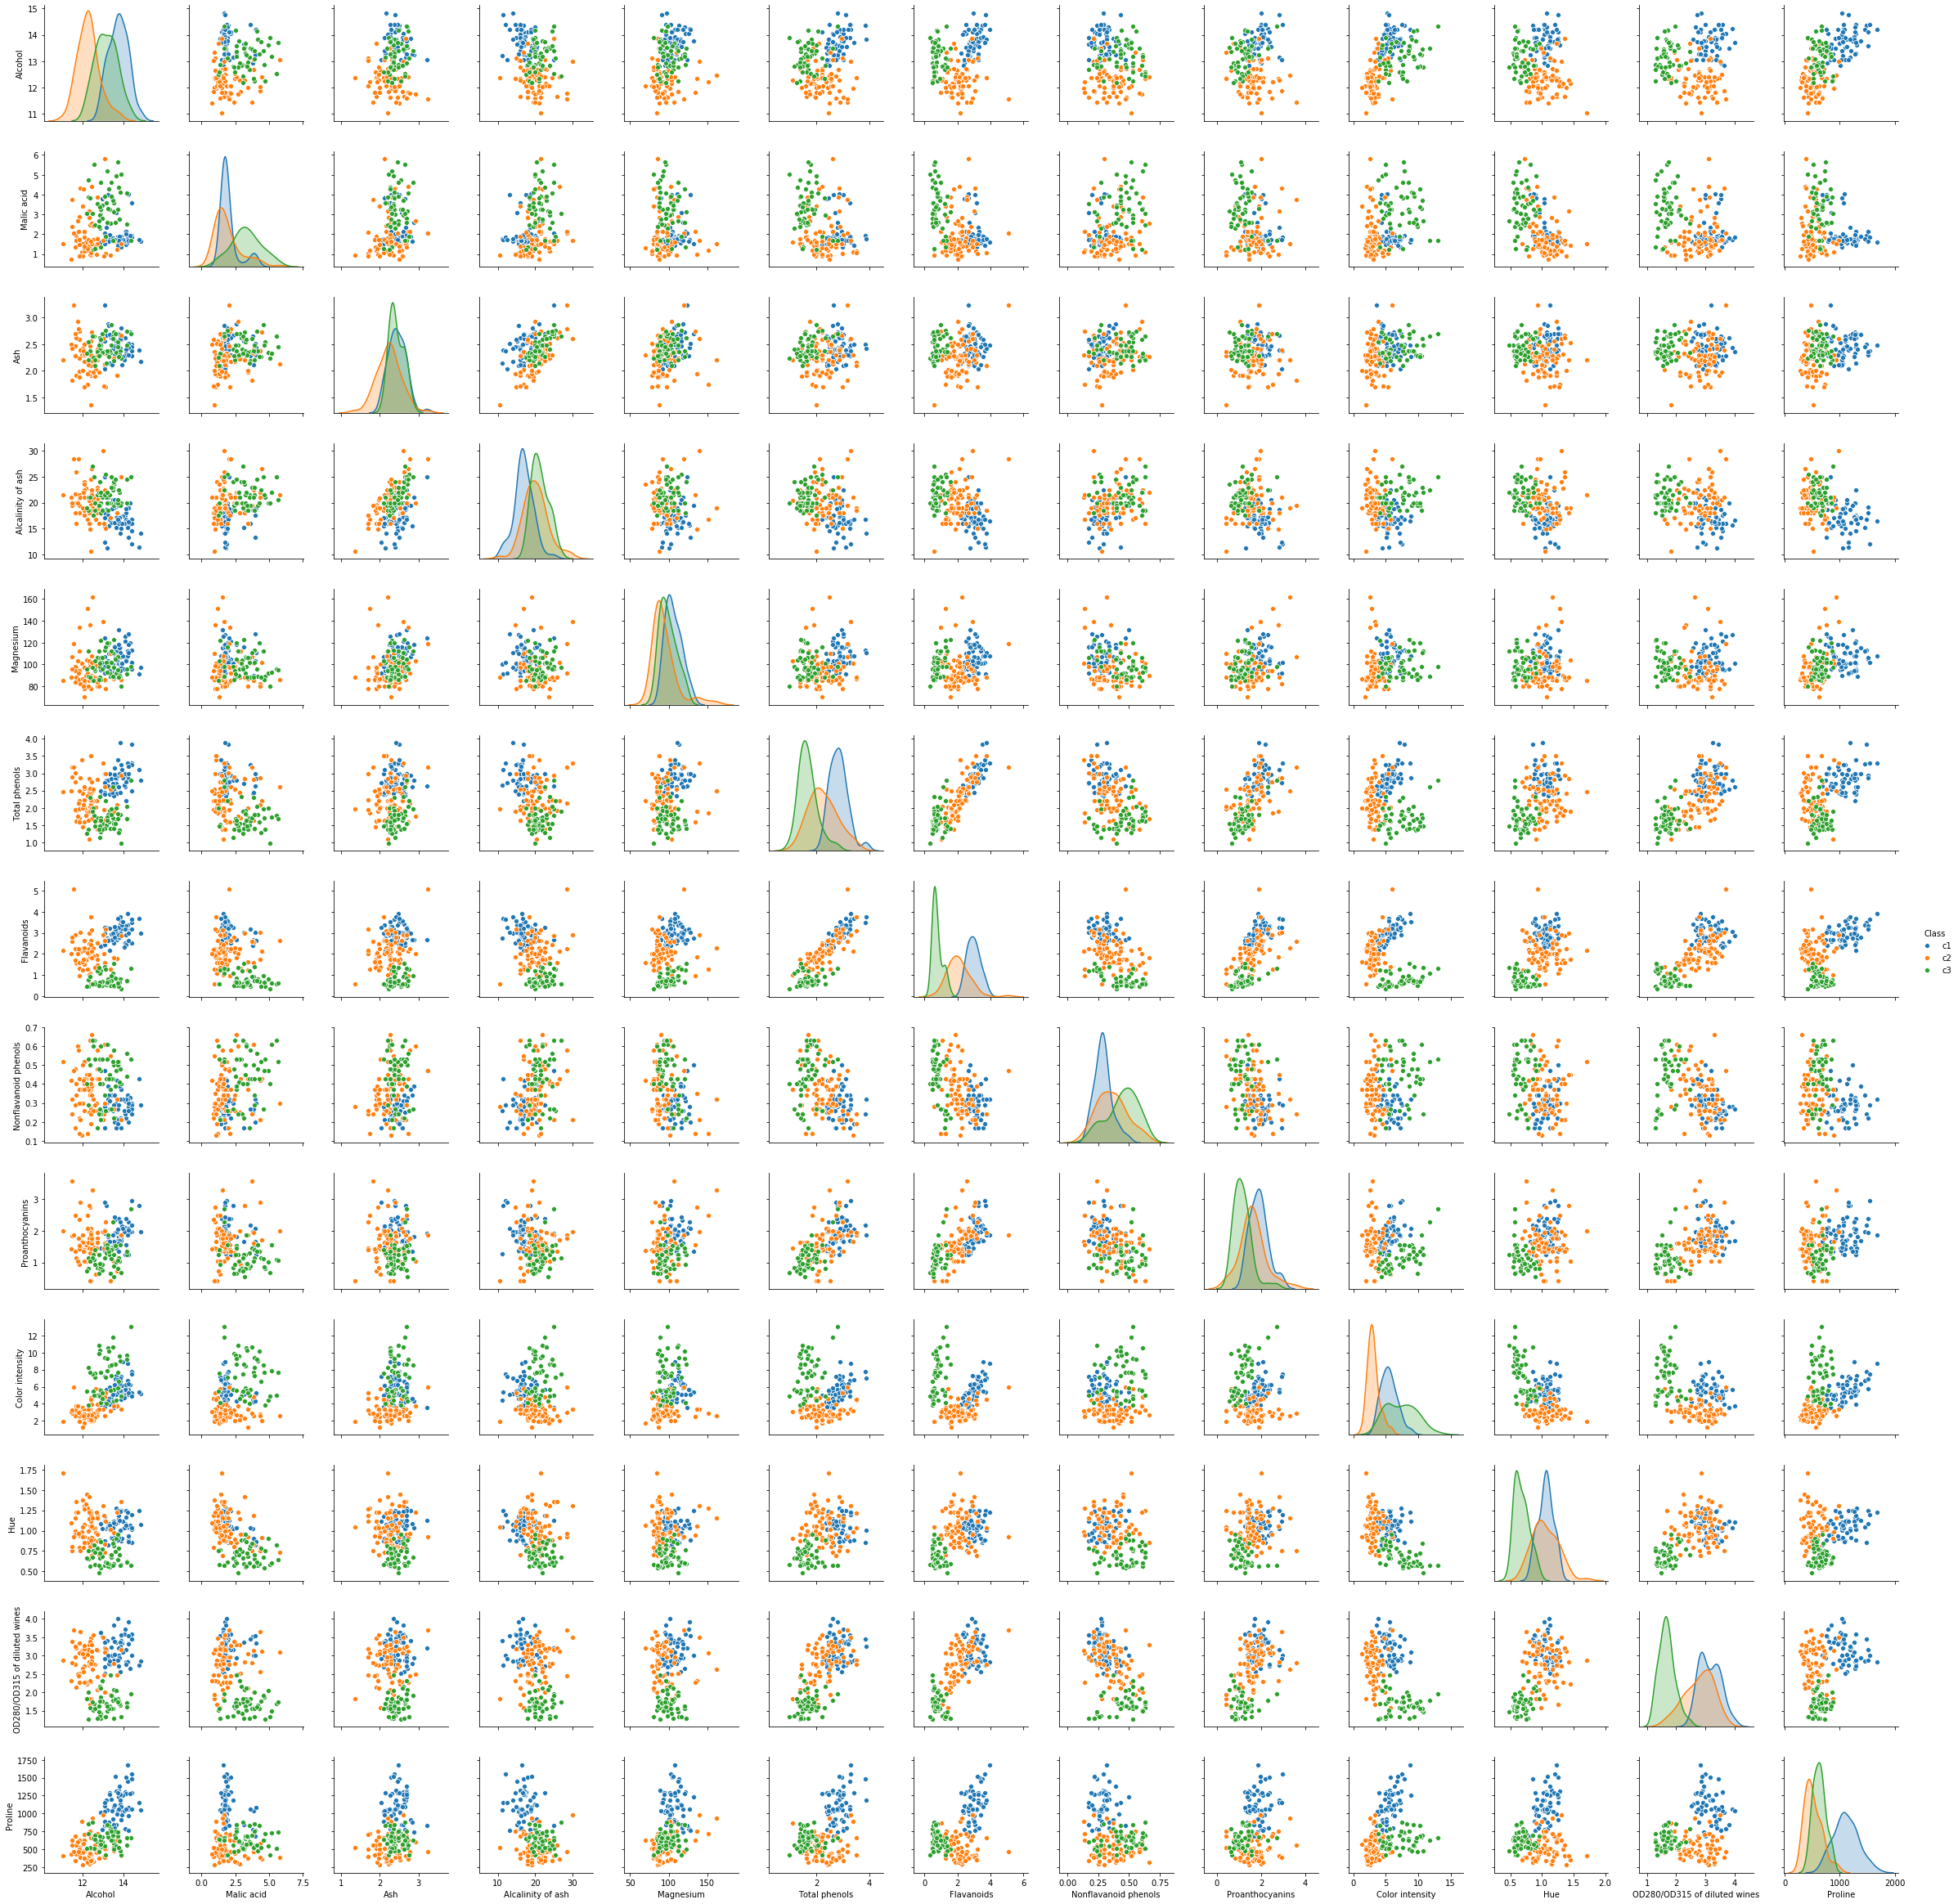

In [13]:
#And plot it separated into the different classes
sns.pairplot(data=wine_data_p, hue="Class")

In [14]:
# You can see that the data appears roughly seperable in some of the 2D plots.


In [15]:
#Lets split the data into X and Y parts, for use in scikitlearn
# (though note they are still in pandas format, and skl uses numpy format)
Y_LABEL_NAME = 'Class' 

wine_data_y = wine_data_p[Y_LABEL_NAME]
wine_data_x = wine_data_p.drop(columns = Y_LABEL_NAME)

In [16]:
# Lets quickly see if PCA changes shape of variables
from sklearn.decomposition import PCA

pca = PCA()

#We can only do PCA on continuous columns


pca.fit(wine_data_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
wine_data_x_pca = pca.transform(wine_data_x)
#Alternately set it in a pipeline, but for now I want to plot the output
wine_data_x_pca

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

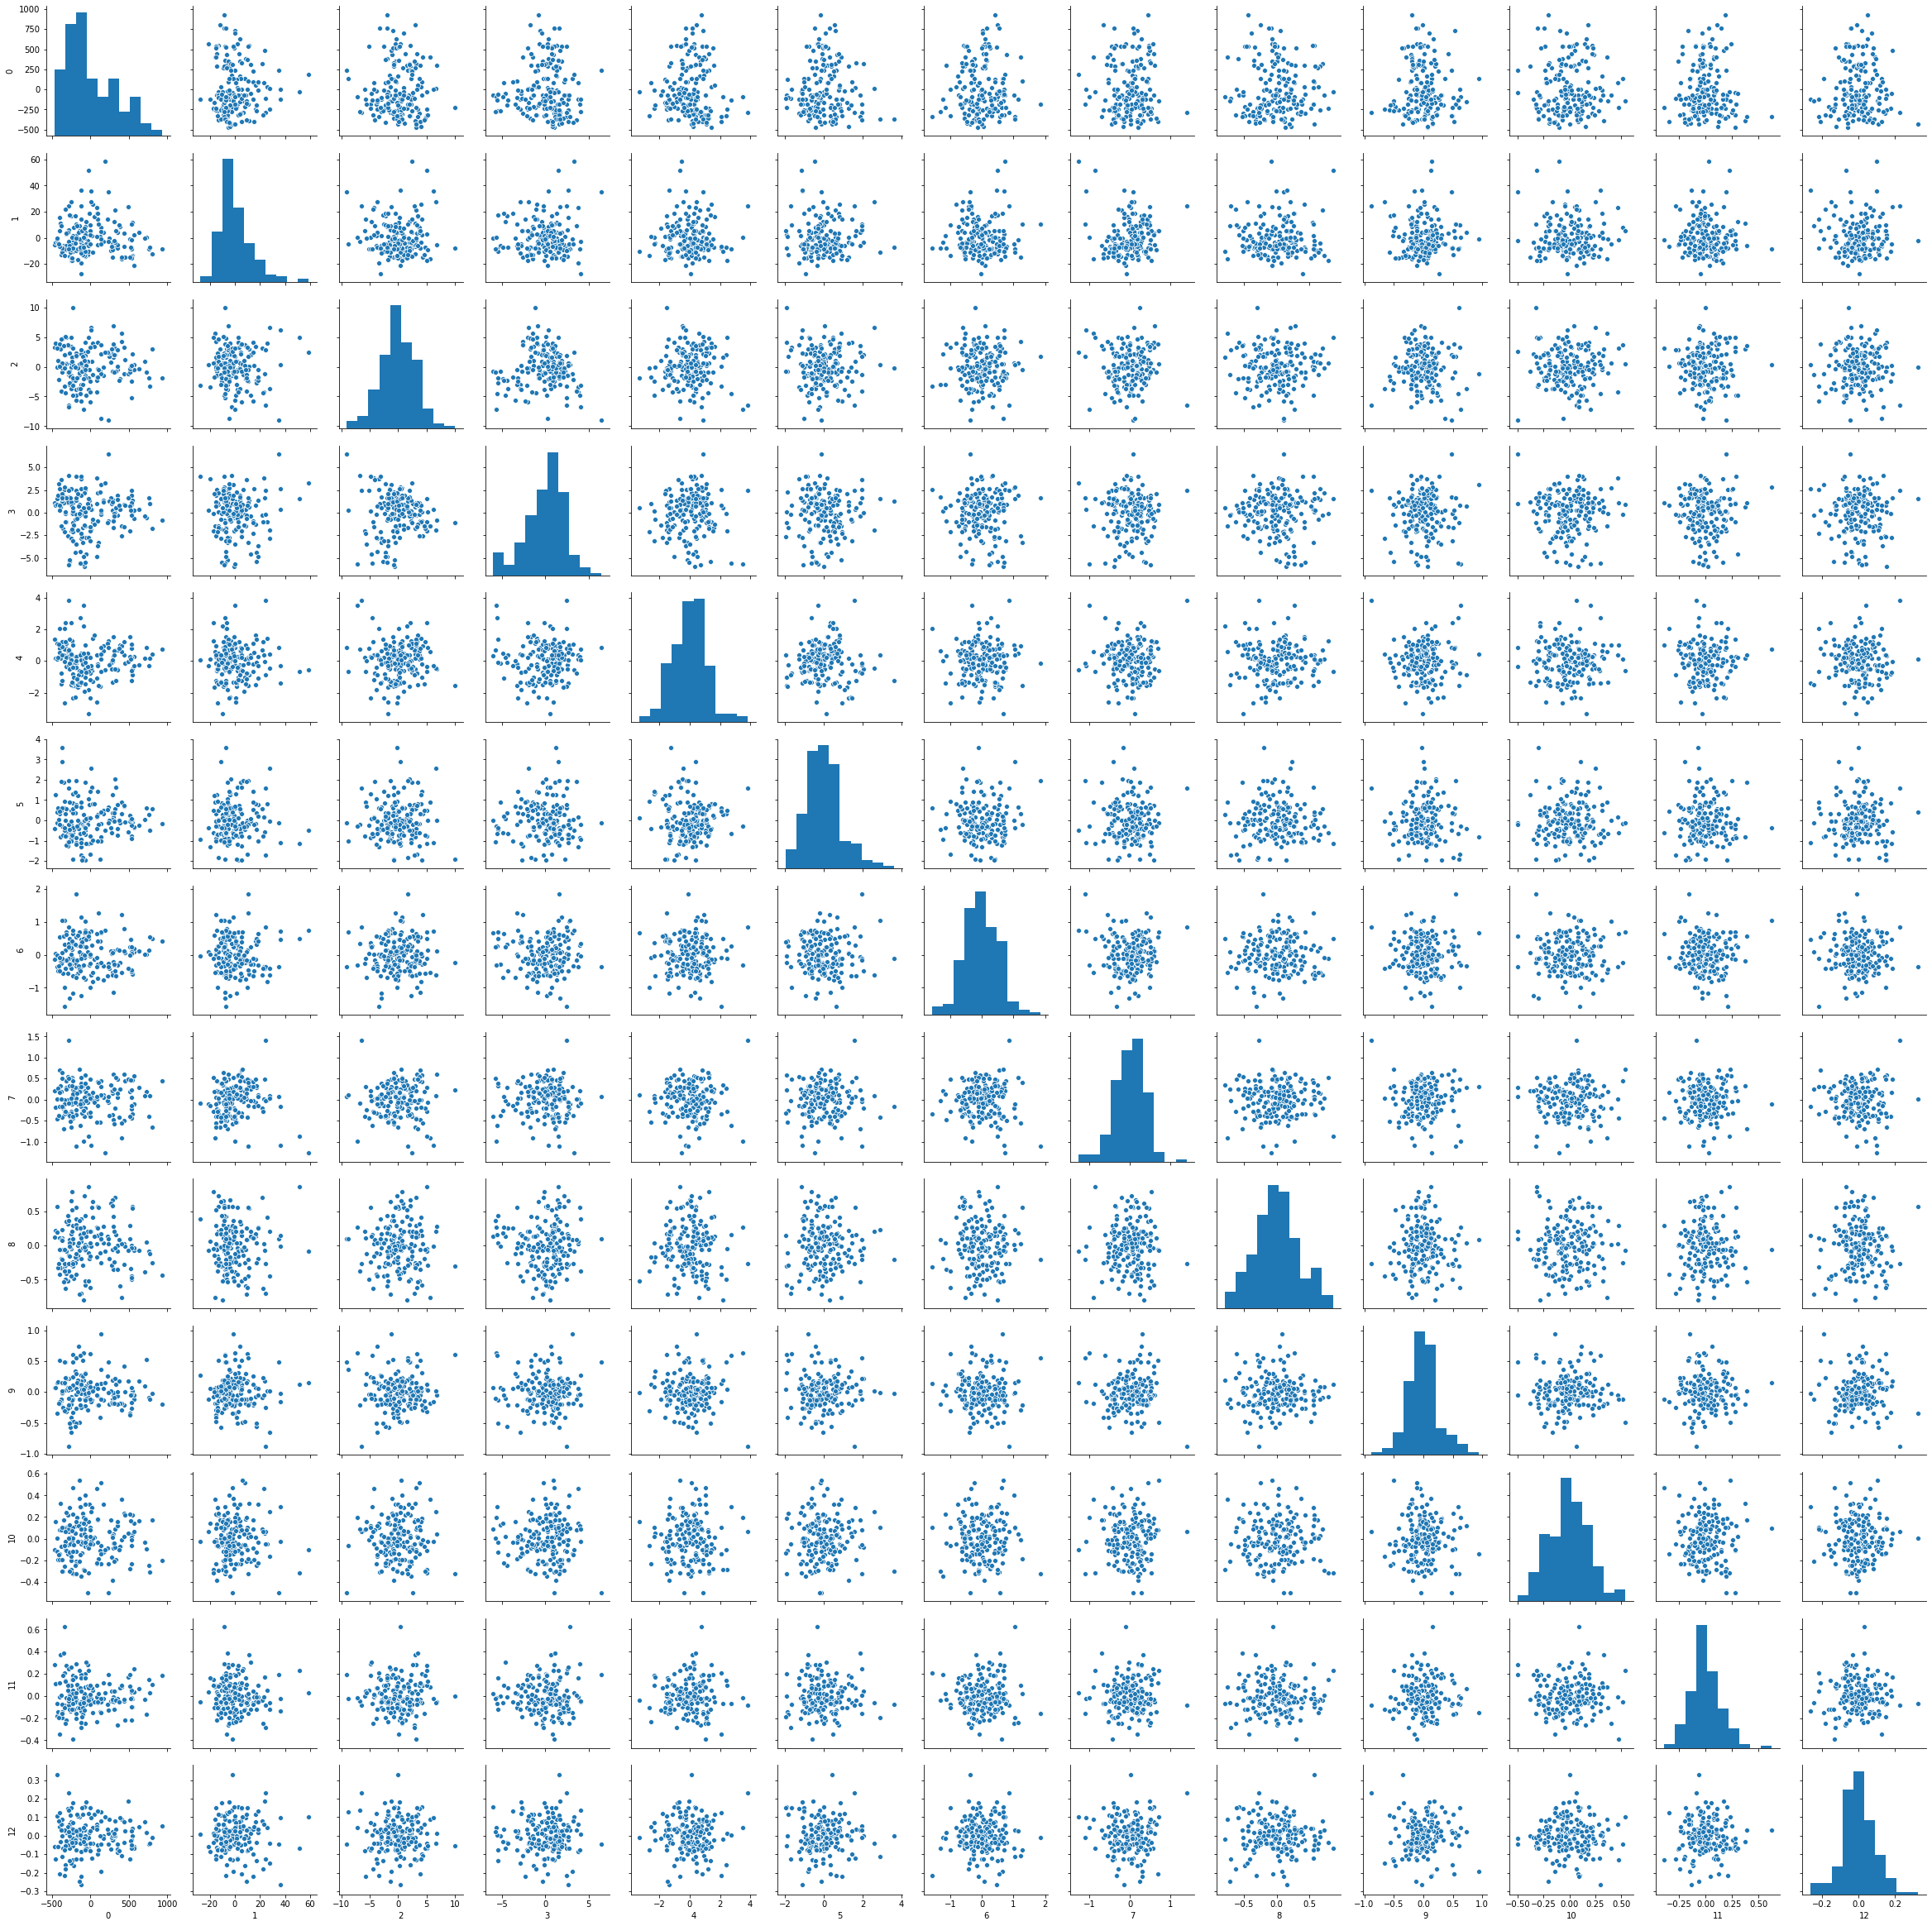

In [18]:
wine_data_x_pca_pd = pd.DataFrame(wine_data_x_pca)
sns.pairplot(wine_data_x_pca_pd)

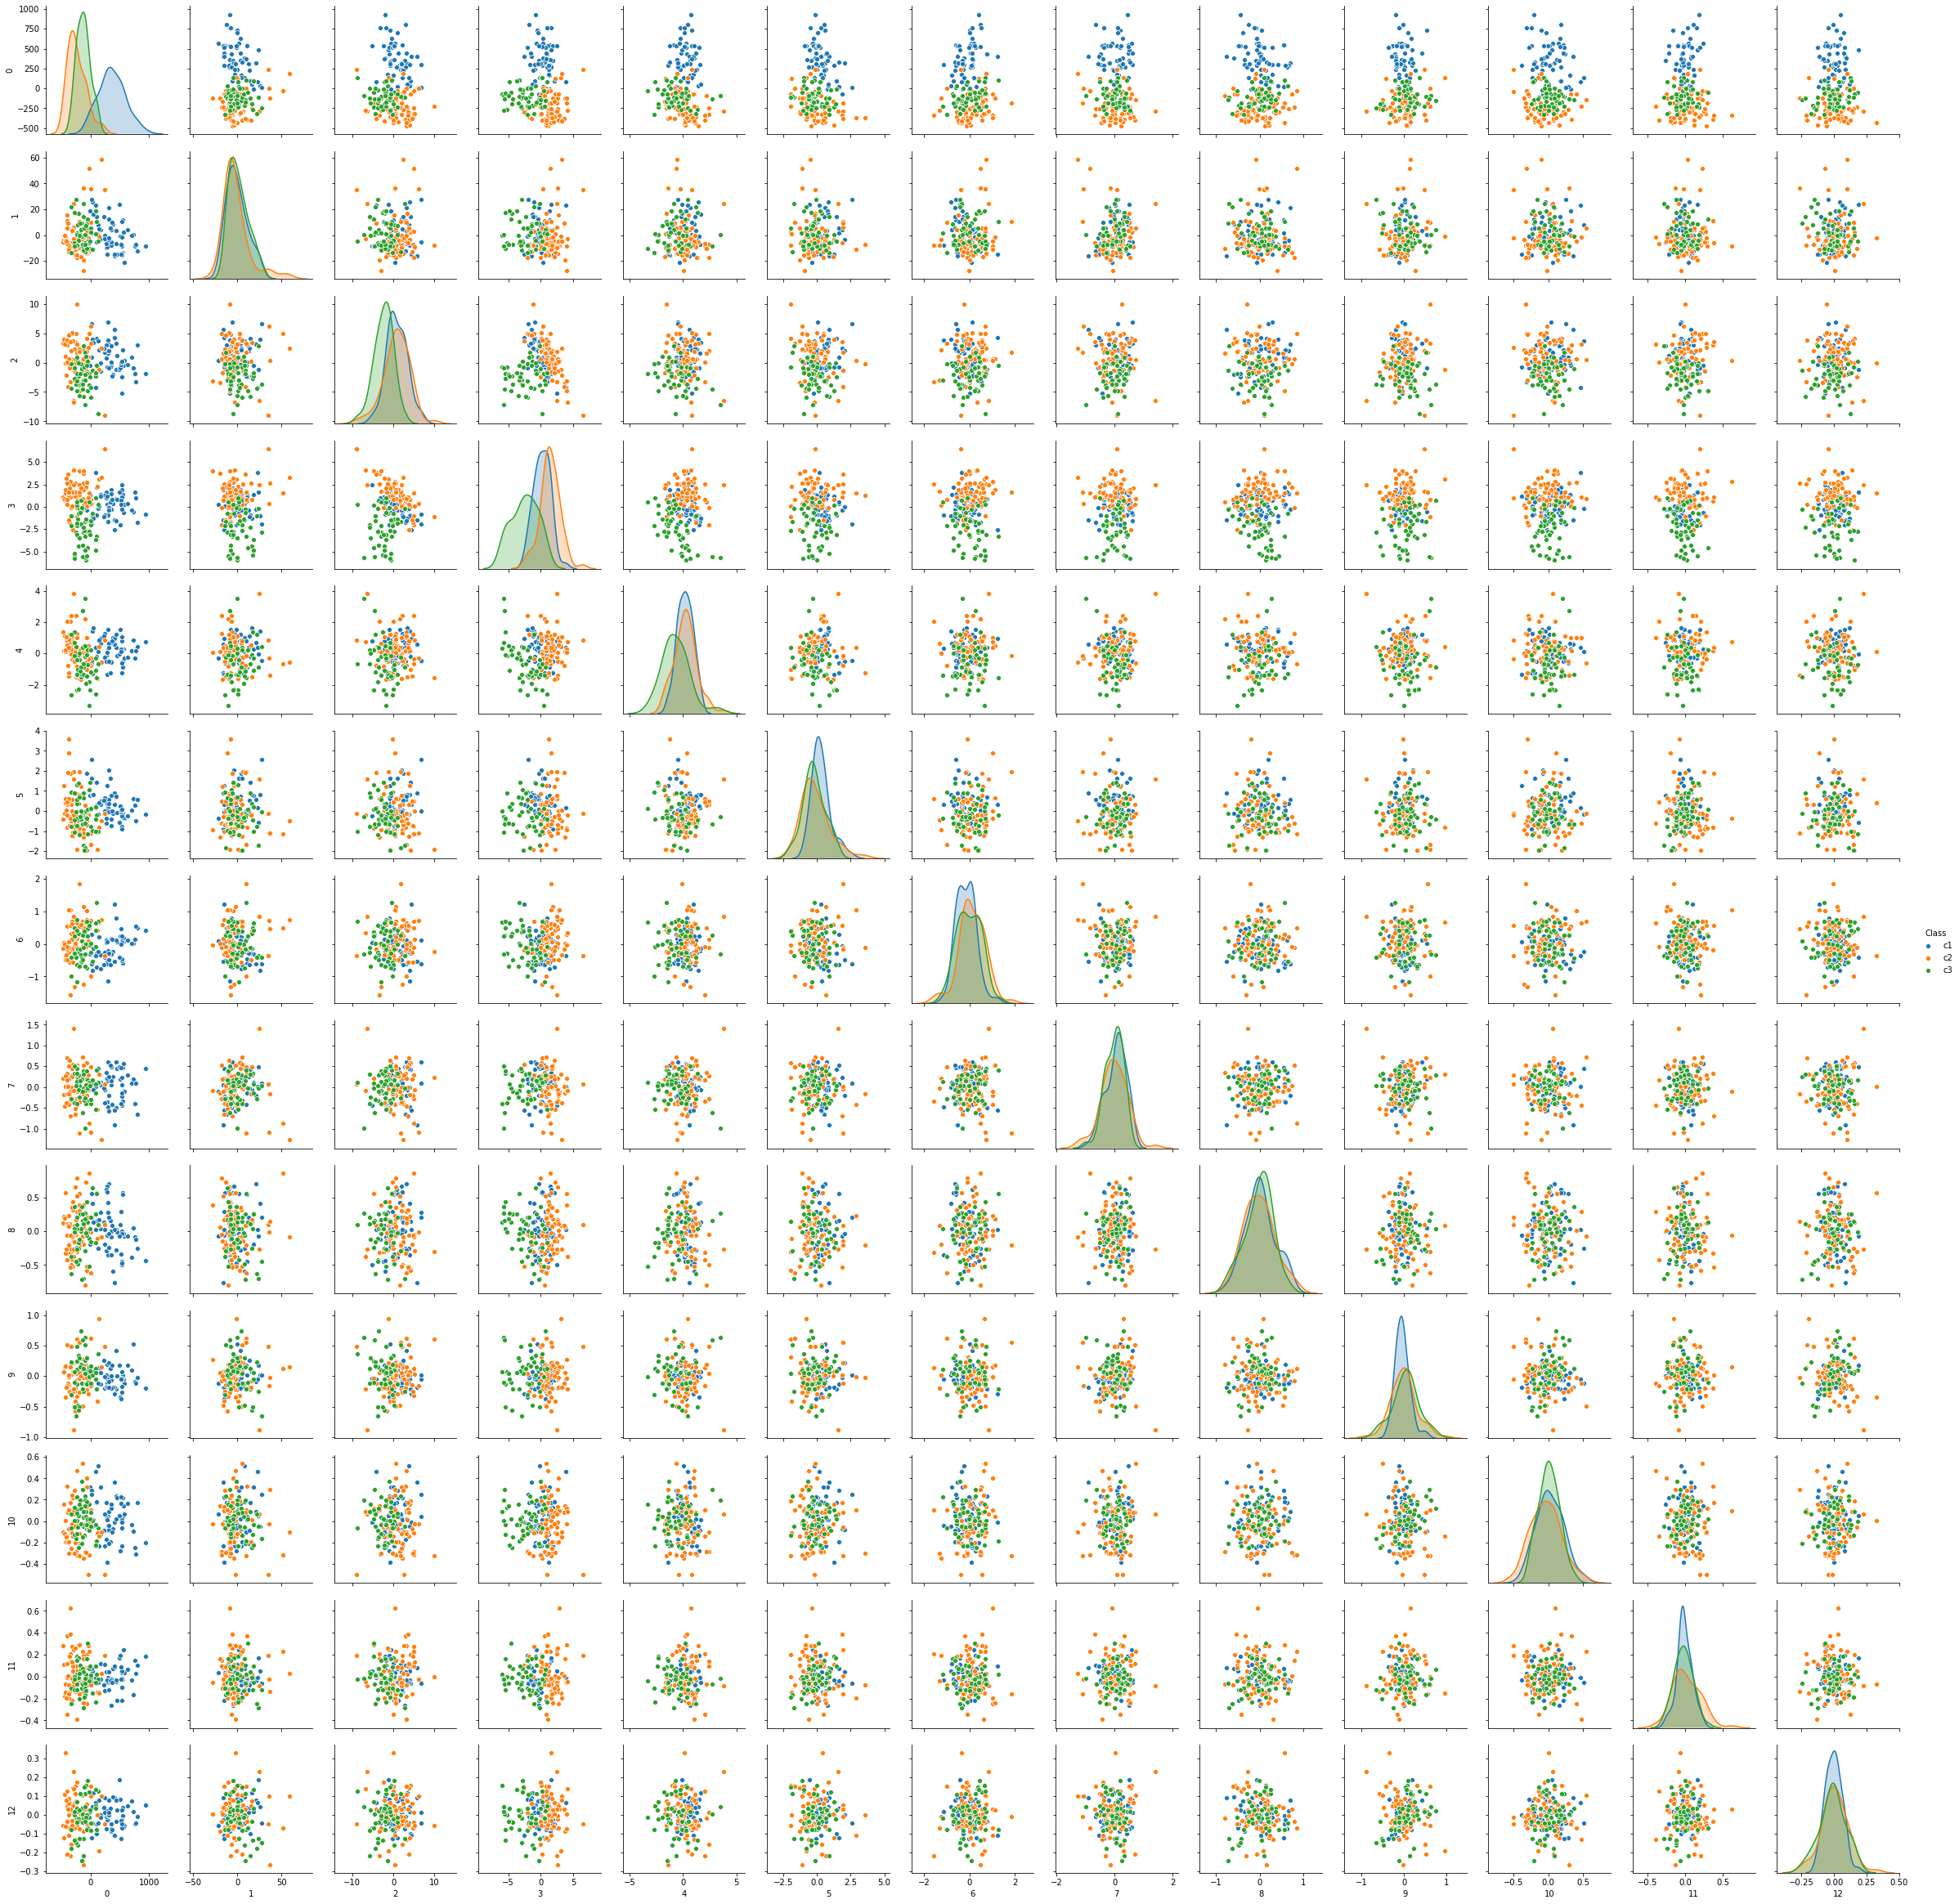

In [19]:
wine_data_x_pca_pd_full = wine_data_x_pca_pd.copy()
wine_data_x_pca_pd_full.insert(0,'Class', wine_data_y)

sns.pairplot(wine_data_x_pca_pd_full, hue='Class')

In [20]:
# Don't forget it can be helpful to scale the outputs before PCA.
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

scaled_pca = pipeline.make_pipeline(StandardScaler(), PCA())

scaled_pca.fit(wine_data_x)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [21]:
wine_data_x_scaled_pca = scaled_pca.transform(wine_data_x)

wine_data_x_scaled_pca_pd = pd.DataFrame(wine_data_x_scaled_pca)

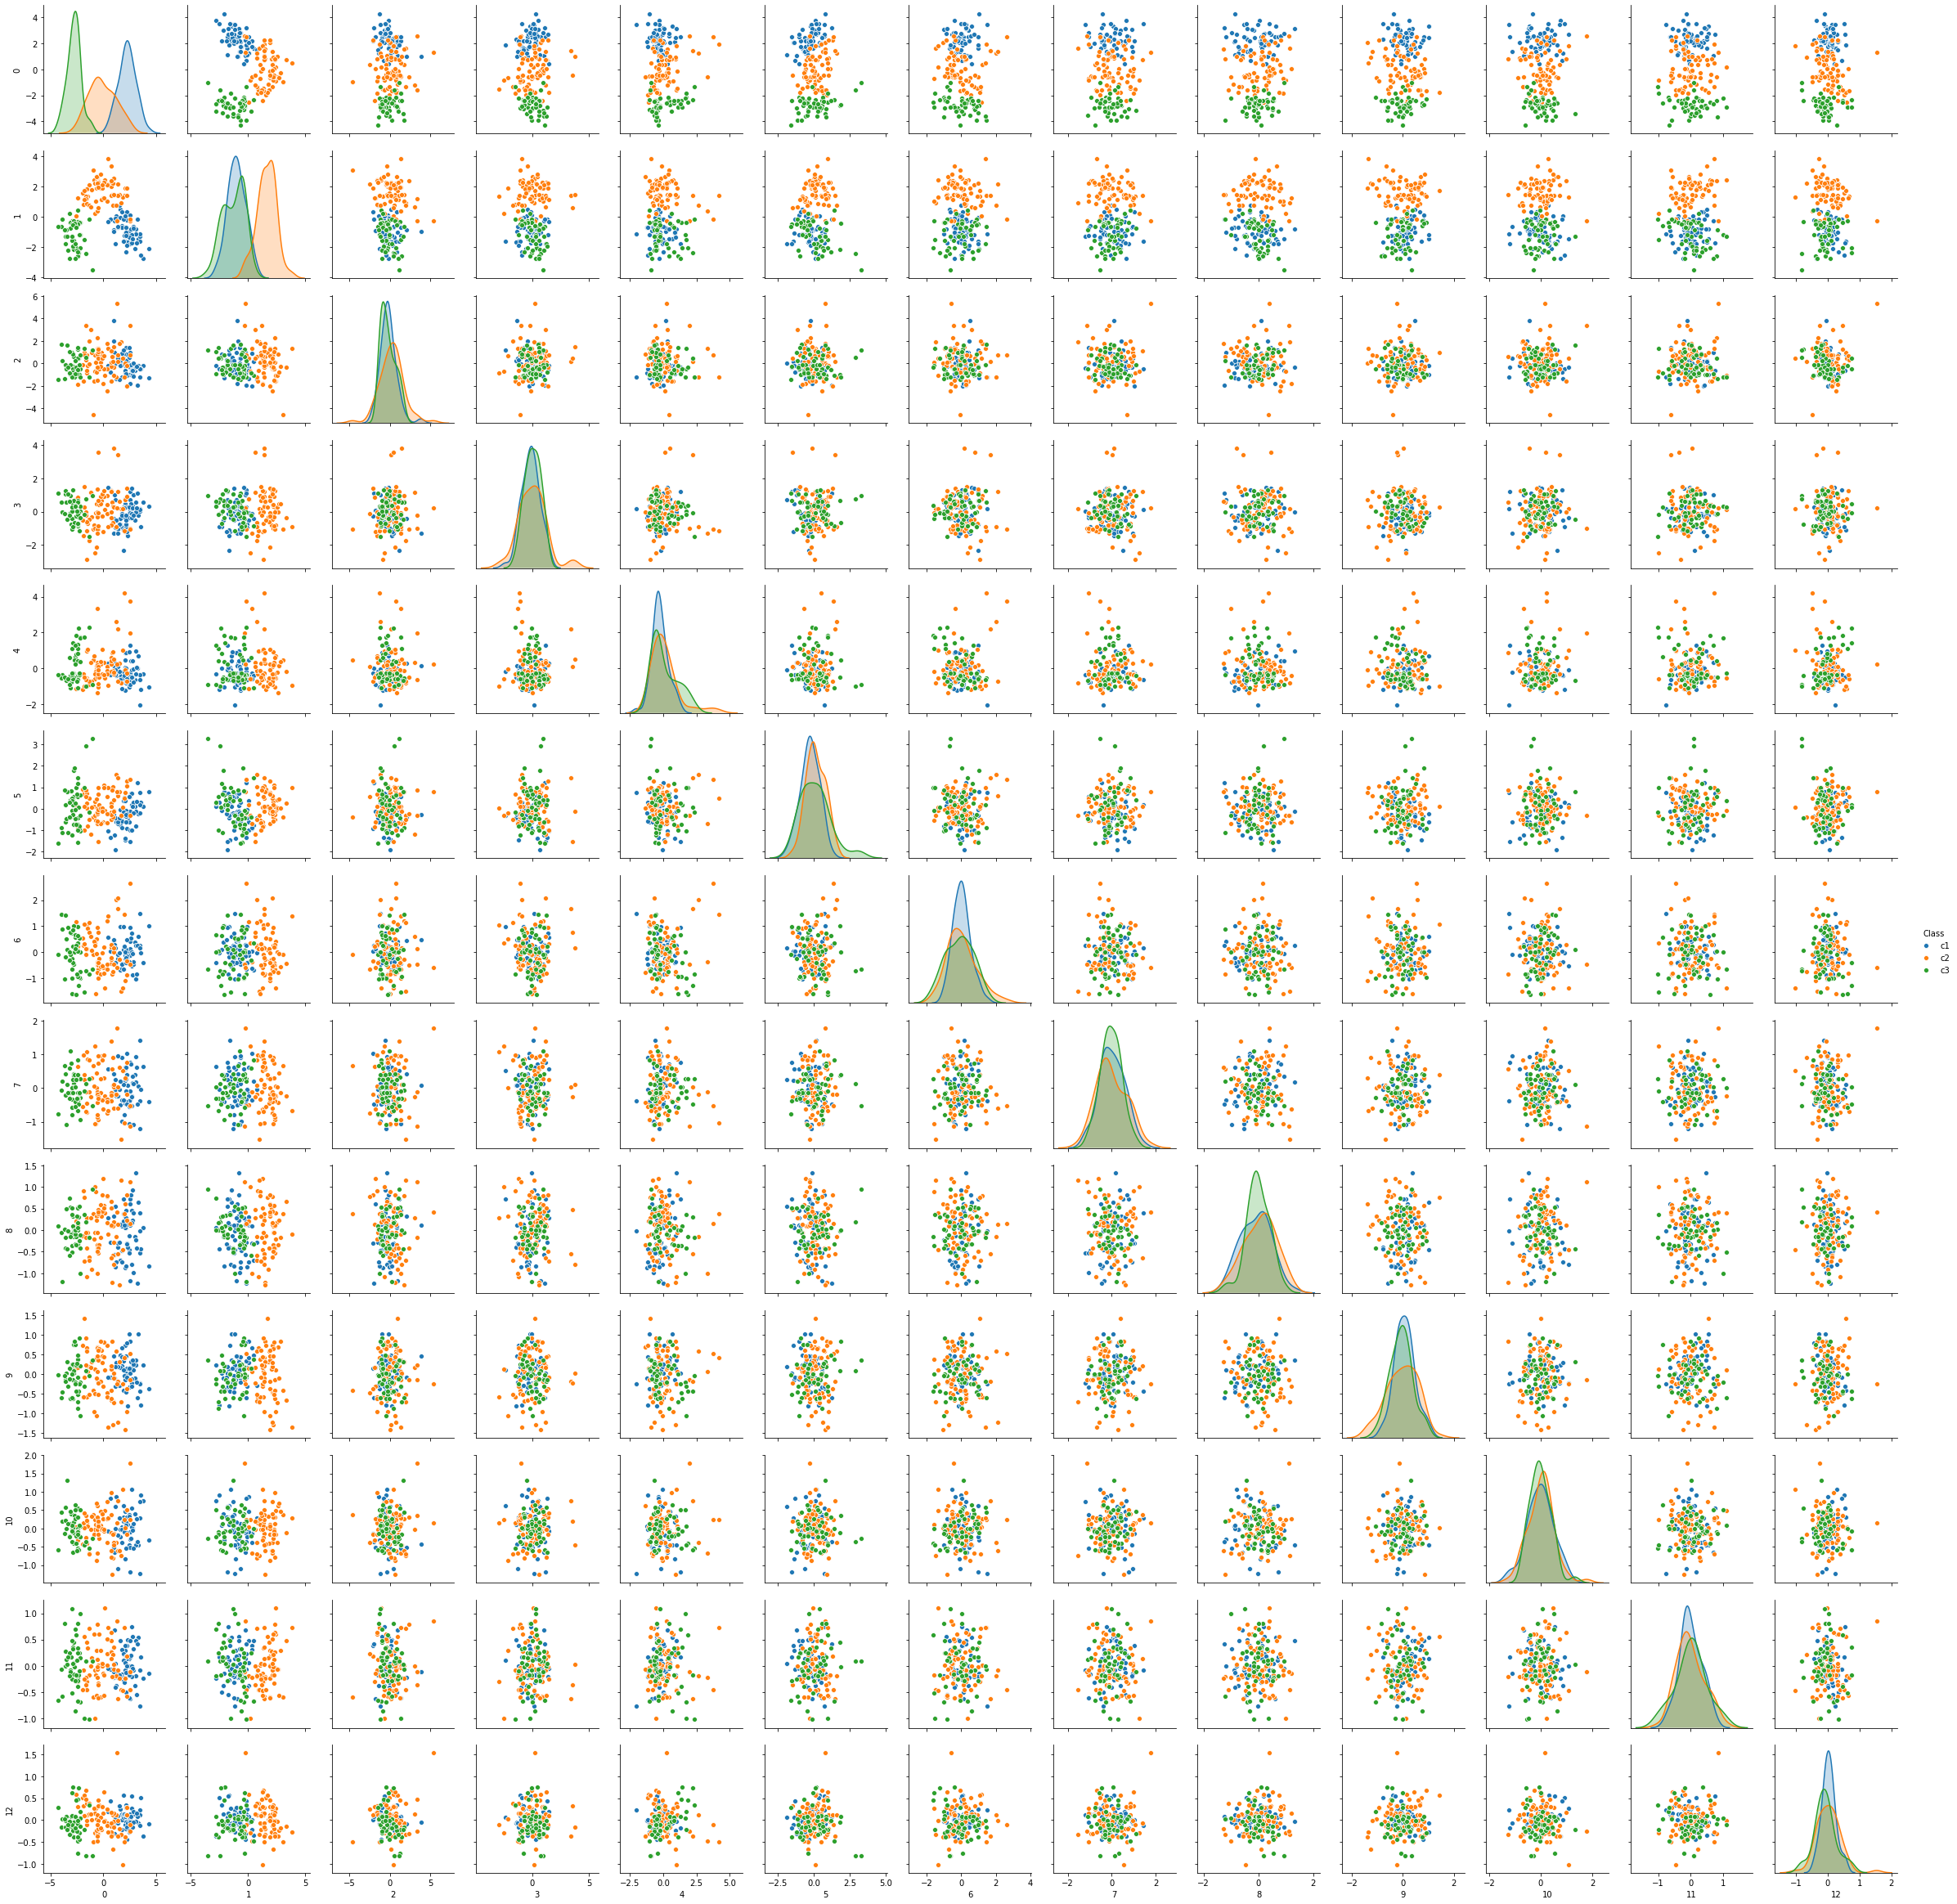

In [22]:
wine_data_x_scaled_pca_pd_full = wine_data_x_scaled_pca_pd.copy()
wine_data_x_scaled_pca_pd_full.insert(0,'Class', wine_data_y)

sns.pairplot(wine_data_x_scaled_pca_pd_full, hue='Class')

The first 2 components in the PCA actually appear to give very good separability.

In [23]:
# Lets try build a classifier.
# We have a multiclass problem here

#Lets split the data into train and test
# (Optionally, lock some away for after model 'hyper-selection', as a final unseen test)
from sklearn.model_selection import train_test_split

test_size = 0.2
print(
    "There are %d observations, so a %f test size gives %d observations to test" % (
        len(wine_data_x),
        test_size,
        int(len(wine_data_x) * test_size),
    )
)
X_train, X_test, y_train, y_test = train_test_split(
    wine_data_x.to_numpy(), wine_data_y.to_numpy(),
    test_size=0.20,
    random_state=42, #Just ensures repeatability
)
# I think sklearn expects numpy data, not pandas, so convert for splitting

There are 178 observations, so a 0.200000 test size gives 35 observations to test


In [24]:
#This is multiclass, with low num classes (3).
# We wills use a one vs rest strategy here for classification output.
# (Optionally, also try 1-1 classifiers, as this is only 3 options here.)
from sklearn.multiclass import OneVsRestClassifier

#For each (class) classifier, lets use a Logistic Regression
# Note that sklearn.linear_model.LogisticRegression
# has a built in 1vRest strategy, so won't need chaining/pipelining
# Also, we shouldn't need PCA first as Logistic is a linear model, and
# PCA is a (set of) linear transformations.
from sklearn.linear_model import LogisticRegression

#Also optional, use LogisticRegressionCV to let sklern pick 'good' hyperparameters
# for Cs and l1_ratio
from sklearn.linear_model import LogisticRegressionCV

classifier_logistic_basic = LogisticRegression(random_state=0, max_iter=1000)

# Note: the following produces a "ConvergenceWarning" for me
classifier_logistic_basic.fit(X_train, y_train)

clb_train_pred = classifier_logistic_basic.predict(X_train)
clb_test_pred = classifier_logistic_basic.predict(X_test)

c:\users\t430\documents\spark\venv_notebook\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# Lets try scaling according to z-scores. Most of the data seems ~ marginally normally distributed, so this may be OK.
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

classifier_scaled_logistic = pipeline.make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=123),
)

classifier_scaled_logistic.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [26]:
csl_train_pred = classifier_scaled_logistic.predict(X_train)
csl_test_pred = classifier_scaled_logistic.predict(X_test)


In [27]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix Training:", confusion_matrix(csl_train_pred, y_train), sep='\n')
print("Confusion Matrix Testing:", confusion_matrix(csl_test_pred, y_test), sep='\n')

Confusion Matrix Training:
[[45  0  0]
 [ 0 57  0]
 [ 0  0 40]]
Confusion Matrix Testing:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [28]:
# So it has actually attained an estimated 100% accuracy,
# both on the training and the testing set.
# Since this is the case, it is probably OK to leave it at this.

#Lets make some estimates about our classifier success.
# Since it is 1vRest, we only need the class accuracies (confusion rows)
# For ease, lets consider them independent

# We will also assume a uniform prior over knowledge of 'p'.
# That can be said - prior_p ~ Beta(1,1)

# Posterior class accuracy will be Beta(1 + #num_success, 1 + num_fails)
# So posteriors are:

# c1: B(15, 1)
# c2: B(15, 1)
# c3: B(9, 1)

# These have (posterior) mean:
# c1: 15/16 = 93.75%
# c2: 15/16 = 93.75%
# c3: 9/10 = 90%

#95% Confidence intervals are:
import scipy
from scipy.stats import beta
def conf_interval_str(class_name, num_success, num_fail, width=0.95):
    return "{class_name}: {lower:.2f}% -> {upper:.2f}%".format(
        class_name = class_name,
        lower = 100 * beta.ppf((1-width)/2, 1+num_success,1+num_fail),
        upper = 100 * beta.ppf(1-(1-width)/2, 1+num_success,1+num_fail),
    )
print(conf_interval_str("C1", 14, 0))
print(conf_interval_str("C2", 14, 0))
print(conf_interval_str("C3", 8, 0))


C1: 78.20% -> 99.83%
C2: 78.20% -> 99.83%
C3: 66.37% -> 99.72%


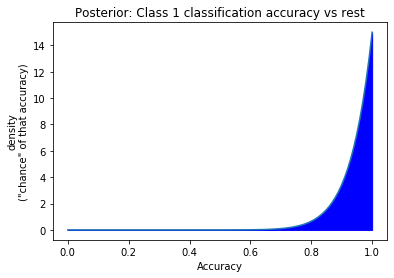

In [29]:
import matplotlib.pyplot as plt

plot_x = np.linspace(0, 1, 100)

b_a = 15
b_b = 1

y_posterior = beta.pdf(plot_x, b_a, b_b)

plt.figure()
plt.title('Posterior: Class 1 classification accuracy vs rest')
plt.xlabel('Accuracy')
plt.ylabel('density\n("chance" of that accuracy)')
plt.plot(plot_x, y_posterior)
plt.fill_between(plot_x, 0, y_posterior, color='b')
plt.show()

In [30]:
# For interest, lets look at the classifier output to see what factors go into the decision
# (Logistic regression is more interpretable, as it considers the factors independently)
lr_step = classifier_scaled_logistic.named_steps['logisticregression']
csl_coefs = lr_step.coef_
print(lr_step.classes_) #Just in case they are out of (our expected) order
print(csl_coefs)

['c1' 'c2' 'c3']
[[ 0.74289982  0.15747444  0.49986809 -0.83333293  0.04260517  0.21331465
   0.64474008 -0.15865725  0.18895561  0.18364112  0.16355972  0.64802216
   1.04049305]
 [-0.93126925 -0.44898955 -0.82180755  0.6689804  -0.03960272  0.01130597
   0.32587083  0.2176276   0.24300848 -1.008272    0.6605215   0.09799292
  -1.00327459]
 [ 0.18836943  0.2915151   0.32193945  0.16435253 -0.00300245 -0.22462062
  -0.97061091 -0.05897035 -0.43196409  0.82463088 -0.82408122 -0.74601508
  -0.03721846]]


In [31]:
csl_var_coefs = list(zip(
    csl_coefs.transpose(),
    wine_column_names[1:]
))
csl_var_coefs

[(array([ 0.74289982, -0.93126925,  0.18836943]), 'Alcohol'),
 (array([ 0.15747444, -0.44898955,  0.2915151 ]), 'Malic acid'),
 (array([ 0.49986809, -0.82180755,  0.32193945]), 'Ash'),
 (array([-0.83333293,  0.6689804 ,  0.16435253]), 'Alcalinity of ash'),
 (array([ 0.04260517, -0.03960272, -0.00300245]), 'Magnesium'),
 (array([ 0.21331465,  0.01130597, -0.22462062]), 'Total phenols'),
 (array([ 0.64474008,  0.32587083, -0.97061091]), 'Flavanoids'),
 (array([-0.15865725,  0.2176276 , -0.05897035]), 'Nonflavanoid phenols'),
 (array([ 0.18895561,  0.24300848, -0.43196409]), 'Proanthocyanins'),
 (array([ 0.18364112, -1.008272  ,  0.82463088]), 'Color intensity'),
 (array([ 0.16355972,  0.6605215 , -0.82408122]), 'Hue'),
 (array([ 0.64802216,  0.09799292, -0.74601508]),
  'OD280/OD315 of diluted wines'),
 (array([ 1.04049305, -1.00327459, -0.03721846]), 'Proline')]

In [32]:
#Lets see the strongest indicators for the classes:
# (Remember that units are contribution to the logistic regression per change in z-score [since it is post standard-scaling])
csl_ordered_contribs = sorted(
    csl_var_coefs,
    key=lambda x: -max(abs(x[0])),
)
print(lr_step.classes_)
csl_ordered_contribs

['c1' 'c2' 'c3']


[(array([ 1.04049305, -1.00327459, -0.03721846]), 'Proline'),
 (array([ 0.18364112, -1.008272  ,  0.82463088]), 'Color intensity'),
 (array([ 0.64474008,  0.32587083, -0.97061091]), 'Flavanoids'),
 (array([ 0.74289982, -0.93126925,  0.18836943]), 'Alcohol'),
 (array([-0.83333293,  0.6689804 ,  0.16435253]), 'Alcalinity of ash'),
 (array([ 0.16355972,  0.6605215 , -0.82408122]), 'Hue'),
 (array([ 0.49986809, -0.82180755,  0.32193945]), 'Ash'),
 (array([ 0.64802216,  0.09799292, -0.74601508]),
  'OD280/OD315 of diluted wines'),
 (array([ 0.15747444, -0.44898955,  0.2915151 ]), 'Malic acid'),
 (array([ 0.18895561,  0.24300848, -0.43196409]), 'Proanthocyanins'),
 (array([ 0.21331465,  0.01130597, -0.22462062]), 'Total phenols'),
 (array([-0.15865725,  0.2176276 , -0.05897035]), 'Nonflavanoid phenols'),
 (array([ 0.04260517, -0.03960272, -0.00300245]), 'Magnesium')]

So this shows that having
- Above average Proline gives a strong suggestion in favor of a class 1, and against class 2.  
- Above average colour gives a strong suggestion against class 2, and mostly towards class 3.
- Above average flavanoids strongly suggests against class 3, mostly in favour of class 1.

We can also look at some of the least performers:  
- Magnesium content doesn't have much effect on the class decision

There is no real need to remove low performing variables here though, so we'll just leave those variables as is.

In [33]:
#Lets export the classifier to use in an external system.
import pickle
import joblib # or just dump, load

CLASSIFIER_OUTPUT_FILENAME = 'wine_classifier_sklearn.pickle'

#with open('pickle_'+CLASSIFIER_OUTPUT_FILENAME, 'wb') as fout:
#    pickle.dump(classifier_scaled_logistic, fout)

joblib.dump(classifier_scaled_logistic, CLASSIFIER_OUTPUT_FILENAME)

['wine_classifier_sklearn.pickle']

In [34]:
import os
classifier_fileinfo = os.stat(CLASSIFIER_OUTPUT_FILENAME)

print("Classifier is %s bytes (%s MB)" % (classifier_fileinfo.st_size, classifier_fileinfo.st_size/(2**20)))

Classifier is 2220 bytes (0.002117156982421875 MB)


In [35]:
# Quickly test reimporting it, and putting it into use predicting:

reimported_classifier = joblib.load(CLASSIFIER_OUTPUT_FILENAME)

r_pred = reimported_classifier.predict(X_test)

print("Confusion Matrix Testing:", confusion_matrix(r_pred, y_test), sep='\n')

Confusion Matrix Testing:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
